In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import json
import time
from datetime import datetime
from time import strptime
import calendar

outputfilepath = os.path.join("Graph-Data")

In [6]:
covid_data = "../Group6-Project1/Repository/2020_US_Region_Mobility_Report.csv"
covid_df = pd.read_csv(covid_data)
covid_df.head()
covid_numbers = "../Group6-Project1/Repository/data-HdO5F.csv"
covid_numbers_df = pd.read_csv(covid_numbers)
new_covid_numbers_df = covid_numbers_df[["DATE_OF_INTEREST", "Cases"]]
new_covid_numbers_df = new_covid_numbers_df.rename(columns = {"DATE_OF_INTEREST" : "date"})
new_covid_numbers_df.head()
new_covid_numbers_df['date'] = pd.to_datetime(new_covid_numbers_df.date)
new_covid_numbers_df['date'] = new_covid_numbers_df['date'].astype(str)
new_covid_numbers_df.head()

date  Cases
0  2020-02-29      1
1  2020-03-03      1
2  2020-03-04      5
3  2020-03-05      3
4  2020-03-06      8

<function matplotlib.pyplot.show(*args, **kw)>

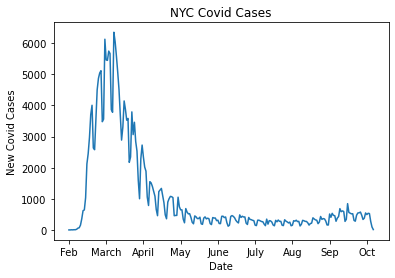

In [32]:
new_covid_numbers_df["month"] = pd.DatetimeIndex(new_covid_numbers_df['date']).month
values = new_covid_numbers_df['Cases']
x_axis = new_covid_numbers_df['date']
plt.xticks(ticks=[2,3,4,5,6,7,8,9,10],labels=['Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'])
ax = plt.gca()
ticks_to_use = new_covid_numbers_df.index[::29]
ax.set_xticks(ticks_to_use)
plt.plot(x_axis, values)
plt.title("NYC Covid Cases")
plt.xlabel("Date")
plt.ylabel("New Covid Cases")
plt.show

In [8]:
new_york_df = covid_df.loc[(covid_df["sub_region_1"] == 'New York')]
new_york_df.head()


new_york_df['date'] = pd.to_datetime(new_york_df.date)
new_york_df['date'] = new_york_df['date'].astype(str)
merge_data=pd.merge(new_york_df, new_covid_numbers_df, on='date')
merge_data.sample(50)



<ipython-input-8-76592889c045>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_df['date'] = pd.to_datetime(new_york_df.date)
<ipython-input-8-76592889c045>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_df['date'] = new_york_df['date'].astype(str)


country_region_code country_region sub_region_1         sub_region_2  \
12945                  US  United States     New York        Albany County   
1633                   US  United States     New York      Herkimer County   
1370                   US  United States     New York        Cayuga County   
9816                   US  United States     New York        Greene County   
8734                   US  United States     New York      Tompkins County   
2976                   US  United States     New York                  NaN   
11992                  US  United States     New York        Queens County   
1993                   US  United States     New York      Chenango County   
7521                   US  United States     New York       Genesee County   
2048                   US  United States     New York      Allegany County   
4493                   US  United States     New York        Nassau County   
8801                   US  United States     New York   Westchester County   
12731                  US  United States     New York        Orange County   
10174                  US  United States     New York        Cayuga County   
4714                   US  United States     New York      Allegany County   
5059                   US  United States     New York        Oswego County   
5695                   US  United States     New York         Tioga County   
12043                  US  United States     New York        Nassau County   
2383                   US  United States     New York        Monroe County   
13949                  US  United States     New York      Delaware County   
12256                  US  United States     New York        Warren County   
5414                   US  United States     New York        Greene County   
2627                   US  United States     New York         Kings County   
14293                  US  United States     New York      Schuyler County   
12464                  US  United States     New York         Essex County   
3200                   US  United States     New York        Otsego County   
5471                   US  United States     New York          Erie County   
14047                  US  United States     New York  St. Lawrence County   
3176                   US  United States     New York      Dutchess County   
12642                  US  United States     New York       Chemung County   
3402                   US  United States     New York      Tompkins County   
9461                   US  United States     New York        Oswego County   
13191                  US  United States     New York         Yates County   
310                    US  United States     New York                  NaN   
5639                   US  United States     New York   Westchester County   
14190                  US  United States     New York        Cayuga County   
3204                   US  United States     New York      Richmond County   
3836                   US  United States     New York      Tompkins County   
8773                   US  United States     New York       Niagara County   
9572                   US  United States     New York         Lewis County   
12154                  US  United States     New York         Essex County   
5310                   US  United States     New York        Queens County   
5809                   US  United States     New York      Rockland County   
14326                  US  United States     New York        Fulton County   
2509                   US  United States     New York        Nassau County   
5931                   US  United States     New York    Rensselaer County   
2470                   US  United States     New York      Sullivan County   
12669                  US  United States     New York        Orange County   
9893                   US  United States     New York        Orange County   
583                    US  United States     New York    Livingston County   

       metro_area iso_3166_

In [9]:
#merge_data=pd.DataFrame({'sub_region_2':["New York County", "Bronx County", "Kings County", "Richmond County", "Queens County"]})
#merge_data   
merge_data = merge_data.loc[(merge_data["sub_region_2"] == "New York County") | (merge_data["sub_region_2"] == "Bronx County") | (merge_data["sub_region_2"] == "Richmond County") | (merge_data["sub_region_2"] == "Queens County") | (merge_data["sub_region_2"] == "Kings County"), :]
merge_data

country_region_code country_region sub_region_1     sub_region_2  \
3                      US  United States     New York     Bronx County   
23                     US  United States     New York     Kings County   
30                     US  United States     New York  New York County   
40                     US  United States     New York    Queens County   
42                     US  United States     New York  Richmond County   
...                   ...            ...          ...              ...   
14311                  US  United States     New York     Bronx County   
14331                  US  United States     New York     Kings County   
14338                  US  United States     New York  New York County   
14348                  US  United States     New York    Queens County   
14350                  US  United States     New York  Richmond County   

       metro_area iso_3166_2_code  census_fips_code        date  \
3             NaN             NaN           36005.0  2020-02-29   
23            NaN             NaN           36047.0  2020-02-29   
30            NaN             NaN           36061.0  2020-02-29   
40            NaN             NaN           36081.0  2020-02-29   
42            NaN             NaN           36085.0  2020-02-29   
...           ...             ...               ...         ...   
14311         NaN             NaN           36005.0  2020-10-23   
14331         NaN             NaN           36047.0  2020-10-23   
14338         NaN             NaN           36061.0  2020-10-23   
14348         NaN             NaN           36081.0  2020-10-23   
14350         NaN             NaN           36085.0  2020-10-23   

       retail_and_recreation_percent_change_from_baseline  \
3                                                   10.0    
23                                                   6.0    
30                                                   1.0    
40                                                   4.0    
42                                                   4.0    
...                                                  ...    
14311                                              -21.0    
14331                                              -28.0    
14338                                              -56.0    
14348                                              -25.0    
14350                                              -22.0    

       grocery_and_pharmacy_percent_change_from_baseline  \
3                                                   -1.0   
23                                                   3.0   
30                                                   2.0   
40                                                   1.0   
42                                                   4.0   
...                                                  ...   
14311                                               -3.0   
14331                                               -4.0   
14338                                              -23.0   
14348                                                0.0   
14350                                               -3.0   

       parks_percent_change_from_baseline  \
3                                   -15.0   
23                                   -5.0   
30                                   -2.0   
40                                    0.0   
42                                   -8.0   
...                                   ...   
14311                               -21.0   
14331                                21.0   
14338                               -35.0   
14348                                42.0   
14350                                -9.0   

       transit_stations_percent_change_from_baseline  \
3                                                8.0   
23                                               3.0   
30                                              -1.0   
40                                              -1.0   
42                                   

In [10]:
New_df = merge_data[['sub_region_1','date','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline','Cases','month']].copy()
New_df = New_df.rename(columns = {'sub_region_1':'State', 'date':'Date', 'retail_and_recreation_percent_change_from_baseline':'Retail Change %', 'grocery_and_pharmacy_percent_change_from_baseline':'Grocery & Pharmacy %', 'parks_percent_change_from_baseline':'Parks Change %','transit_stations_percent_change_from_baseline':'Transit Stations Change %', 'workplaces_percent_change_from_baseline':'Workplace Change %','residential_percent_change_from_baseline':'Residental Change %', 'month':'Month'}, inplace = False)

month_ave = New_df.groupby('Month').mean().reset_index()
month_ave["Month"] = pd.to_datetime(month_ave["Month"], format='%m').dt.month_name().str.slice(stop=3)
month_ave

Month  Retail Change %  Grocery & Pharmacy %  Parks Change %  \
0   Feb         5.000000              1.800000       -6.000000   
1   Mar       -28.744828             -3.600000       -5.151724   
2   Apr       -66.793333            -27.706667      -32.633333   
3   May       -55.574194            -17.322581       12.800000   
4   Jun       -42.960000            -10.373333       44.466667   
5   Jul       -32.683871             -9.580645       46.387097   
6   Aug       -30.954839            -11.477419       46.220000   
7   Sep       -27.753333             -9.300000       34.047619   
8   Oct       -30.391304             -9.147826        8.973913   

   Transit Stations Change %  Workplace Change %  Residental Change %  \
0                   1.200000            5.600000            -0.600000   
1                 -34.303448          -29.089655            13.227586   
2                 -67.020000          -63.433333            26.986667   
3                 -58.400000          -52.374194            21.148387   
4                 -48.893333          -43.860000            16.146667   
5                 -44.296774          -42.845161            12.967742   
6                 -42.006452          -39.922581            10.890323   
7                 -40.306667          -38.673333            10.660000   
8                 -38.826087          -35.956522            11.217391   

         Cases  
0     1.000000  
1  2248.379310  
2  3644.733333  
3   918.064516  
4   362.566667  
5   316.483871  
6   239.258065  
7   344.266667  
8   482.695652

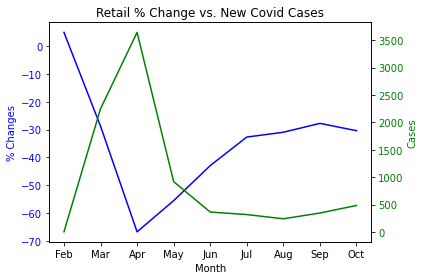

In [13]:
x = month_ave['Month']
y = month_ave['Retail Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
plt.title("Retail % Change vs. New Covid Cases")
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Retail Change % vs Cases"))
plt.show()



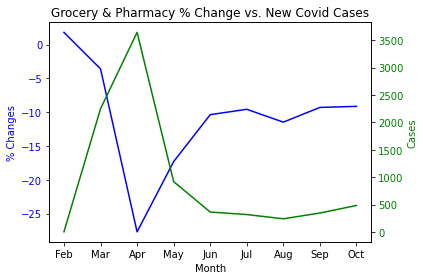

In [15]:
x = month_ave['Month']
y = month_ave['Grocery & Pharmacy %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
plt.title("Grocery & Pharmacy % Change vs. New Covid Cases")
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Grocery & Pharmacy Change  vs Cases"))
plt.show()



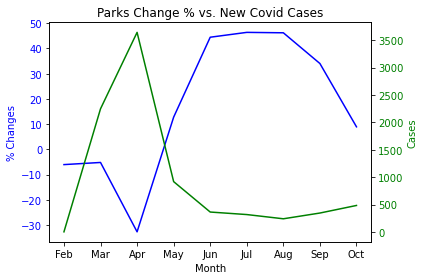

In [16]:
x = month_ave['Month']
y = month_ave['Parks Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
plt.title("Parks Change % vs. New Covid Cases")
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Parks Change % vs Cases"))
plt.show()



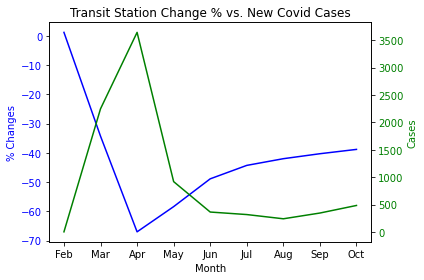

In [17]:
x = month_ave['Month']
y = month_ave['Transit Stations Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
plt.title("Transit Station Change % vs. New Covid Cases")
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Transit Stations Change % vs Cases"))
plt.show()


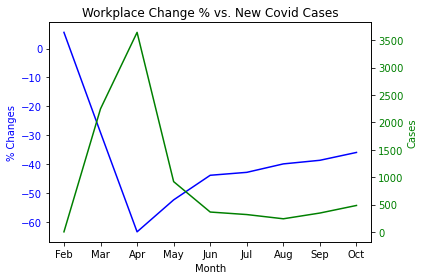

In [18]:
x = month_ave['Month']
y = month_ave['Workplace Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
plt.title("Workplace Change % vs. New Covid Cases")
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Workplace Change % vs Cases"))
plt.show()


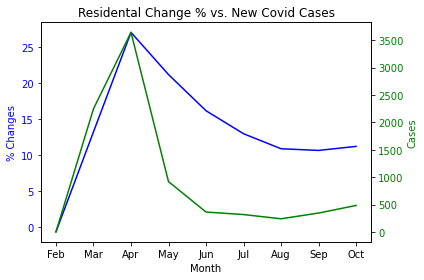

In [19]:
x = month_ave['Month']
y = month_ave['Residental Change %']
y2 = month_ave['Cases']
fig, ax1 = plt.subplots()
plt.title("Residental Change % vs. New Covid Cases")
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Residental Change % vs Cases"))
plt.show()


In [24]:
restaurant_data = "../Group6-Project1/Repository/YoY_Seated_Diner_Data.csv"
restaurant_df = pd.read_csv(restaurant_data)
restaurant_df

city_new_york_df = restaurant_df.loc[(restaurant_df["Type"] == 'city')]
Name_newyork_df = city_new_york_df.loc[(city_new_york_df["Name"] == 'New York')]
Name_newyork_df

Type      Name  18-Feb  19-Feb  20-Feb  21-Feb  22-Feb  23-Feb  24-Feb  \
88  city  New York       1      11       3       0       3      13       7   

    25-Feb  ...  16-Oct  17-Oct  18-Oct  19-Oct  20-Oct  21-Oct  22-Oct  \
88       1  ...   -82.3   -66.8  -68.88   -81.2  -78.49  -78.15  -78.38   

    23-Oct  24-Oct  25-Oct  
88  -72.25  -66.73  -71.36  

[1 rows x 253 columns]

In [25]:
Name_newyork_df = Name_newyork_df.melt(id_vars=["Type", "Name"], var_name="Date", value_name="% Change")
Name_newyork_df['Year'] = 2020
date_pull = Name_newyork_df["Date"].str.split("-", n = 1, expand = True)
Name_newyork_df["Day"] = date_pull[0]
Name_newyork_df["Month"] = date_pull[1]
d = {'Jan':'01', 'Feb':'02', 'Mar':'03', 'Apr':'04', 'May':'05', 'Jun':'06', 'Jul':'07', 'Aug':'08', 'Sep':'09', 'Oct':10}
Name_newyork_df.Month = Name_newyork_df.Month.map(d)

cols = ['Year', 'Month', 'Day']
Name_newyork_df['combined'] = Name_newyork_df[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

Name_newyork_df = Name_newyork_df[['combined','% Change', 'Month']].copy()
Name_newyork_df = Name_newyork_df.rename(columns = {'combined':'date'})
Name_newyork_df

date  % Change Month
0    2020-02-18      1.00    02
1    2020-02-19     11.00    02
2    2020-02-20      3.00    02
3    2020-02-21      0.00    02
4    2020-02-22      3.00    02
..          ...       ...   ...
246  2020-10-21    -78.15    10
247  2020-10-22    -78.38    10
248  2020-10-23    -72.25    10
249  2020-10-24    -66.73    10
250  2020-10-25    -71.36    10

[251 rows x 3 columns]

In [26]:
covid_numbers = "../Group6-Project1/Repository/data-HdO5F.csv"
covid_numbers_df = pd.read_csv(covid_numbers)
covid_numbers_df
new_covid_numbers_df = covid_numbers_df[["DATE_OF_INTEREST", "Cases"]]
new_covid_numbers_df = new_covid_numbers_df.rename(columns = {"DATE_OF_INTEREST" : "date"})
new_covid_numbers_df.head()
new_covid_numbers_df['date'] = pd.to_datetime(new_covid_numbers_df.date)
new_covid_numbers_df['date'] = new_covid_numbers_df['date'].astype(str)
new_covid_numbers_df.head()

date  Cases
0  2020-02-29      1
1  2020-03-03      1
2  2020-03-04      5
3  2020-03-05      3
4  2020-03-06      8

In [27]:
merge_data1 = pd.merge(Name_newyork_df, new_covid_numbers_df, on='date')
merge_data1.head(50)

date  % Change Month  Cases
0   2020-02-29     -2.00    02      1
1   2020-03-10    -30.00    03     70
2   2020-03-11    -36.00    03    155
3   2020-03-12    -52.00    03    357
4   2020-03-13    -61.00    03    619
5   2020-03-14    -64.00    03    643
6   2020-03-15    -69.00    03   1036
7   2020-03-16    -77.00    03   2121
8   2020-03-17   -100.00    03   2452
9   2020-03-18   -100.00    03   2971
10  2020-03-19   -100.00    03   3707
11  2020-03-20   -100.00    03   4007
12  2020-03-21   -100.00    03   2637
13  2020-03-22   -100.00    03   2579
14  2020-03-23   -100.00    03   3570
15  2020-03-24   -100.00    03   4503
16  2020-03-25   -100.00    03   4874
17  2020-03-26   -100.00    03   5047
18  2020-03-27   -100.00    03   5118
19  2020-03-28   -100.00    03   3479
20  2020-03-29   -100.00    03   3562
21  2020-03-30   -100.00    03   6130
22  2020-03-31   -100.00    03   5464
23  2020-04-10   -100.00    04   4513
24  2020-04-11   -100.00    04   3731
25  2020-04-12   -100.00    04   2888
26  2020-04-13   -100.00    04   3313
27  2020-04-14   -100.00    04   4146
28  2020-04-15   -100.00    04   3878
29  2020-04-16   -100.00    04   3528
30  2020-04-17   -100.00    04   3584
31  2020-04-18   -100.00    04   2172
32  2020-04-19   -100.00    04   2346
33  2020-04-20   -100.00    04   3794
34  2020-04-21   -100.00    04   3064
35  2020-04-22   -100.00    04   3461
36  2020-04-23   -100.00    04   2842
37  2020-04-24   -100.00    04   2535
38  2020-04-25   -100.00    04   1597
39  2020-04-26   -100.00    04   1003
40  2020-04-27   -100.00    04   2289
41  2020-04-28   -100.00    04   2728
42  2020-04-29   -100.00    04   2341
43  2020-04-30   -100.00    04   2022
44  2020-05-10   -100.00    05    458
45  2020-05-11    -99.98    05   1232
46  2020-05-12   -100.00    05   1285
47  2020-05-13   -100.00    05   1335
48  2020-05-14    -99.98    05   1112
49  2020-05-15    -99.96    05    875

In [28]:
month_ave1 = merge_data1['Month'].astype(int).reset_index()
month_ave1 = merge_data1.groupby('Month').mean().reset_index()
month_ave1["Month"] = pd.to_datetime(month_ave1["Month"], format='%m').dt.month_name().str.slice(stop=3)
month_ave1["Month"] = pd.to_datetime(month_ave1.Month, format='%b', errors='coerce').dt.month
month_ave1 = month_ave1.sort_values(by="Month")
month_ave1["Month"] = pd.to_datetime(month_ave1["Month"], format='%m').dt.month_name().str.slice(stop=3)
month_ave1

Month    % Change        Cases
1   Feb   -2.000000     1.000000
2   Mar  -85.863636  2959.136364
3   Apr -100.000000  2941.666667
4   May  -99.511818   785.863636
5   Jun  -97.715238   326.523810
6   Jul  -91.431818   307.545455
7   Aug  -84.432273   246.272727
8   Sep  -80.339524   377.714286
0   Oct  -75.600625   400.187500

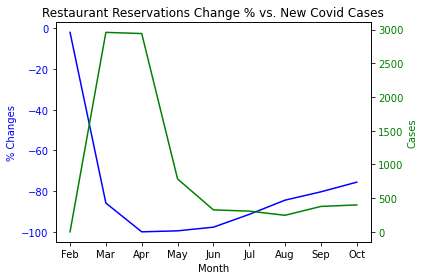

In [34]:
x = month_ave1['Month']
y = month_ave1['% Change']
y2 = month_ave1['Cases']
fig, ax1 = plt.subplots()
color = 'blue'
plt.title("Restaurant Reservations Change % vs. New Covid Cases")
ax1.set_xlabel('Month')
ax1.set_ylabel('% Changes', color=color)
ax1.plot(x,y,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'green'
ax2.set_ylabel('Cases', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig(os.path.join(outputfilepath, "Restaurant Change % vs Cases"))
plt.show()

